In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_csv("haberman.csv",names=['Age','Year','AN','SurvivalStatus'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Year              306 non-null int64
AN                306 non-null int64
SurvivalStatus    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


,Age,Year,AN,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [5]:
df.shape

(306, 4)

In [6]:
df[pd.isnull(df['Age'])]

,Age,Year,AN,SurvivalStatus


In [7]:
df.describe()

,Age,Year,AN,SurvivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
#two classes for survival status
#1 for person survived
#2 for person died after surgery
df['SurvivalStatus'].value_counts()

1    225
2     81
Name: SurvivalStatus, dtype: int64

In [91]:
#function for dense plot
def dens_plot(features,class_var):
    #adding the white grid style 
    sns.set_style(style="whitegrid")
    #adding datapoint colour and size
    sns.FacetGrid(data=df, hue=class_var,size=7).map(sns.distplot,features).add_legend()

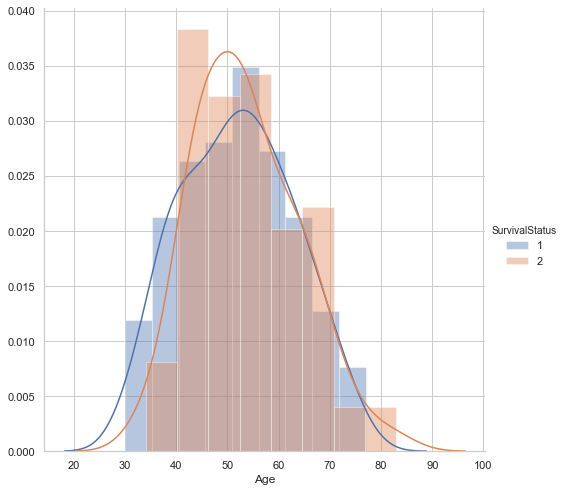

In [59]:
dens_plot("Age","SurvivalStatus")
plt.show()

Conclusion :<br>1 This histogram is overlapping each other.<br>2 It is seen that people within range of 40-60 are more likely to die.<br>3 People less than age 40 are more likely to survive.

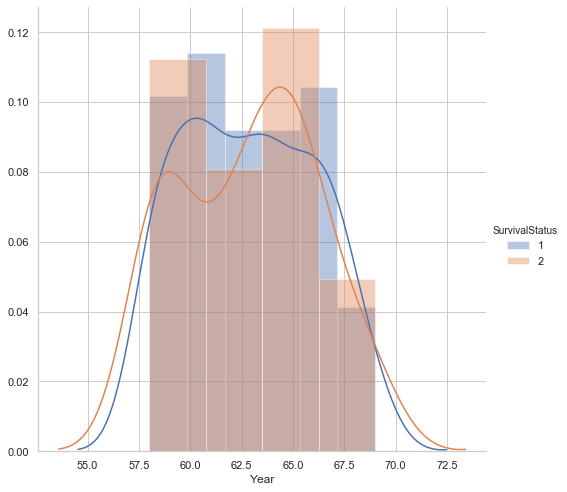

In [60]:
dens_plot("Year","SurvivalStatus")
plt.show()

Conclusion :<br>1 The plot represents the immense overlapping of respective two classes.<br>2 It is clearly seen that the patients whose operation was done in between 57.5 to 60 and 62.5 to 65 died.

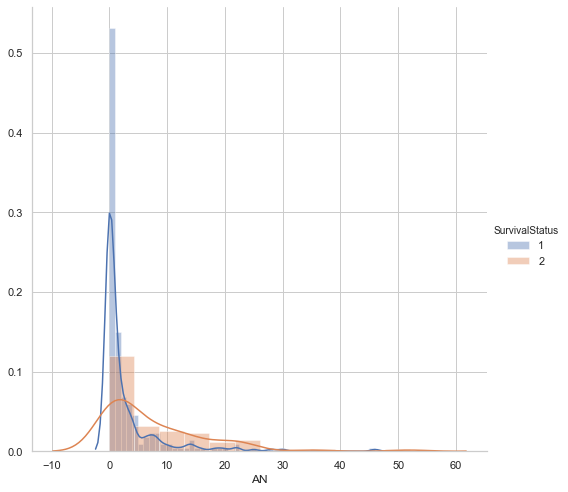

In [61]:
dens_plot("AN","SurvivalStatus")
plt.show()

Conclusion :<br>1 Partially overlapping among the classes observed.<br>2 It is clearly visible that the patients having 0 axil nodes will survive.

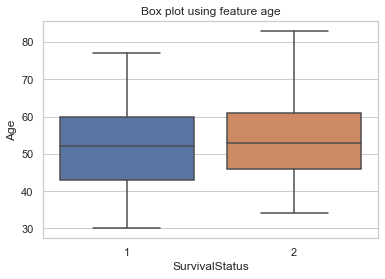

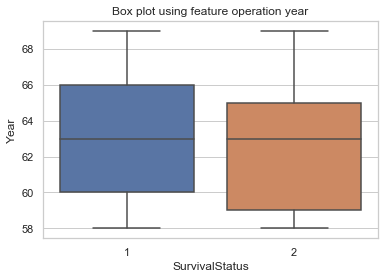

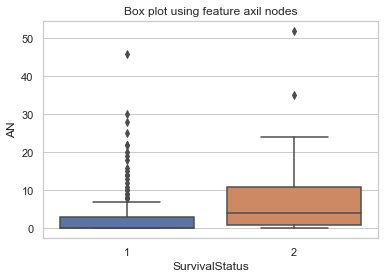

In [96]:
#Box Plot for the feature Age
sns.boxplot(x='SurvivalStatus',y = 'Age', data = df)
plt.title("Box plot using feature age")
plt.show()

#Box Plot for the feature Year of Operations
sns.boxplot(x = 'SurvivalStatus', y = 'Year', data = df)
plt.title("Box plot using feature operation year")
plt.show()

#Box Plot for the feature axillary nodes
sns.boxplot(x = 'SurvivalStatus', y ='AN', data = df)
plt.title("Box plot using feature axil nodes")
plt.show()

Conclusion: <br>1 It is clear that almost 95% of data points are overlapping with almost same median. Hence, age feature is not sufficient to find out the exact scenario.<br>2 It is clear that almost 80% of data points are overlapping with almost same median. Hence, operation year feature is not sufficient to find out the exact scenario.<br>3 It is observed that box plot of class_1 have outliers and also visible that around 50% of patients have axil nodes less than or equal to 3.

In [123]:
#function for scatterplot
def scatter_plot(cv1,cv2):
    sns.set_style("whitegrid")
    sns.FacetGrid(df,hue="SurvivalStatus",height=6).map(plt.scatter,cv1,cv2).add_legend()


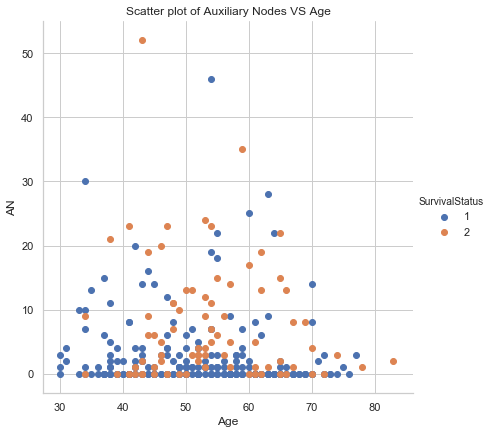

In [125]:
#Age vs AN
scatter_plot("Age","AN")
plt.title("Scatter plot of Auxiliary Nodes VS Age")
plt.show()

Conclusion: There is an overlap of around 80%-85%. So we can't classify survival of patients on the basis of axil_nodes and Age.


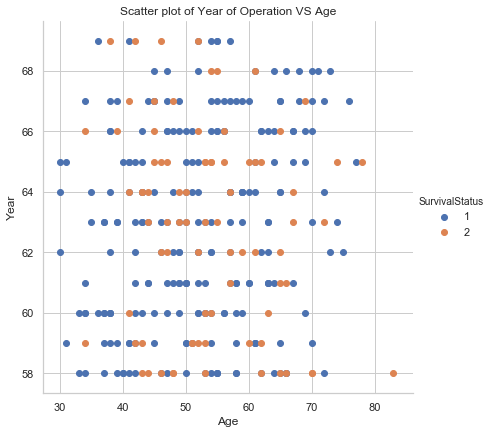

In [126]:
#Age vs Year
scatter_plot("Age","Year")
plt.title("Scatter plot of Year of Operation VS Age")
plt.show()

Conclusion: There is an overlap of around 85%-90% . So we can't classify survival of patients on the basis of Age and Operation_Year.

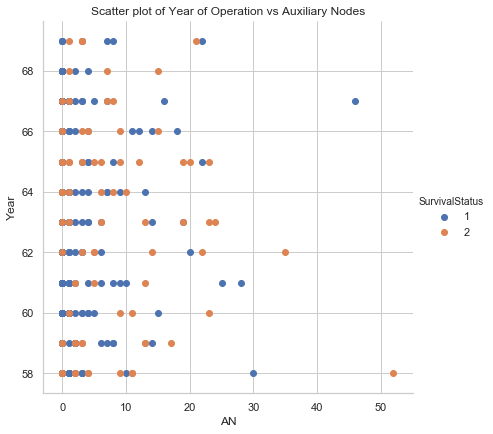

In [127]:
#AN vs Age
scatter_plot("AN","Year")
plt.title("Scatter plot of Year of Operation vs Auxiliary Nodes")
plt.show()

Conclusion: There is an overlap of around 90%-95% . So , it is very difficult to classify the survival of patients who had undergone breast surgery on the basis of Operation_Year and axil_nodes.

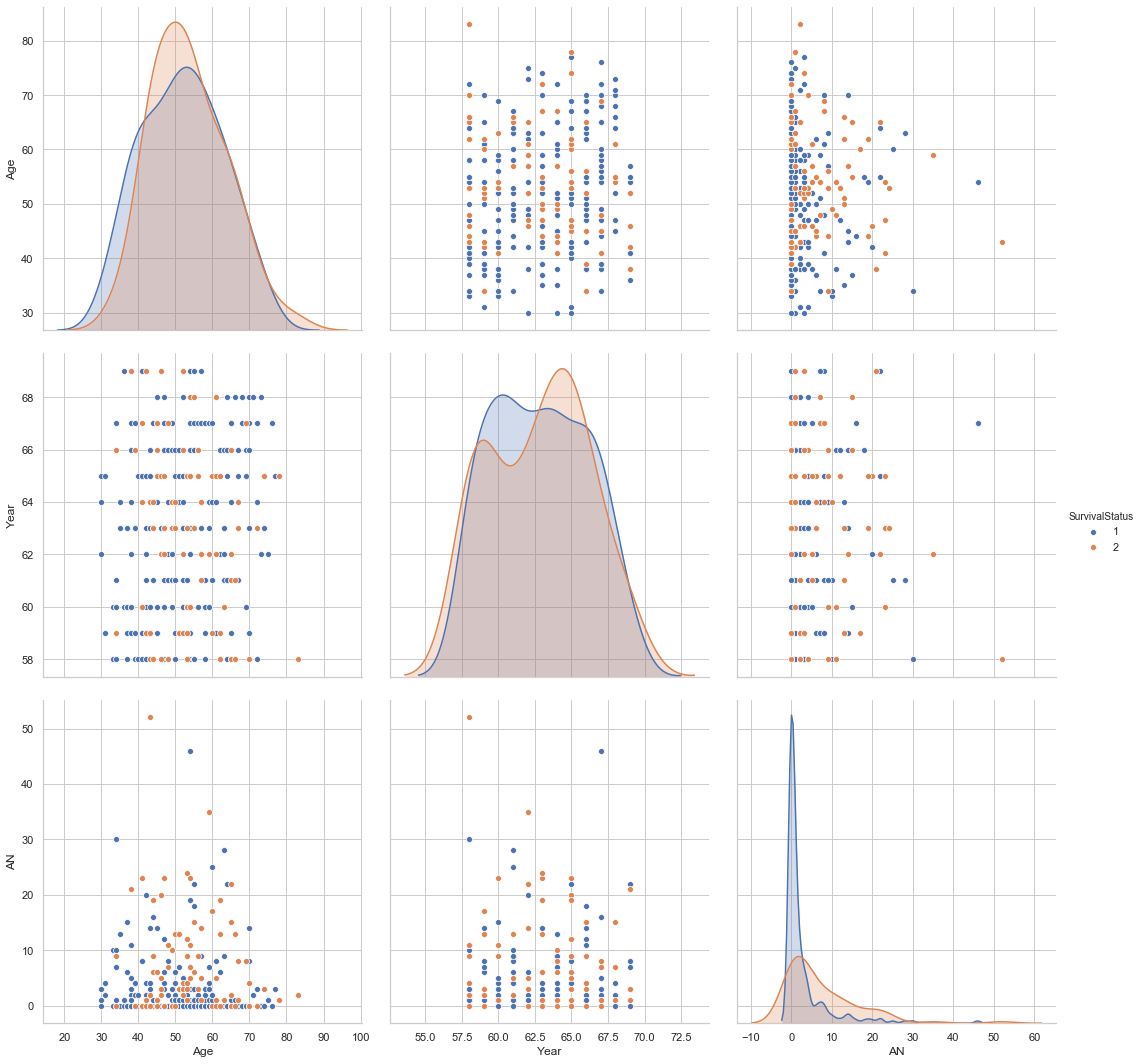

In [128]:
#pairplot on Haberman dataset
sns.set_style("whitegrid")
sns.pairplot(df,hue="SurvivalStatus", vars=["Age","Year","AN"], height=5)
plt.show()

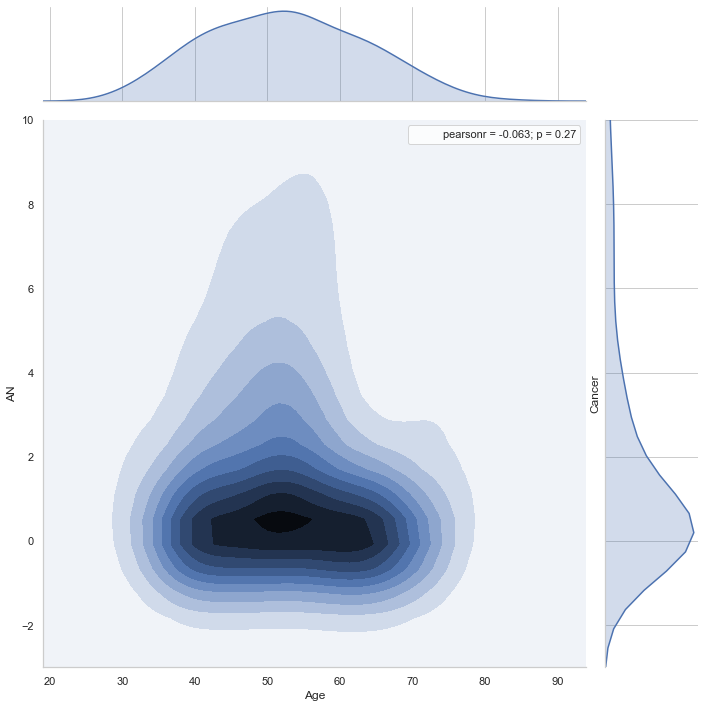

In [129]:
#Kernel Density Estimation
sns.jointplot(data=df, x="Age",y="AN", kind="kde",height=10,stat_func=pearsonr)
plt.ylim(-3,10)
plt.ylabel("Cancer")
plt.show()

Conclusion :<br>
1 Negative pearson correlation coefficient shows strong negative relationship.<br>
2 We cannot assume that that our evidence of the relationship between the variables is very strong as p value is large.

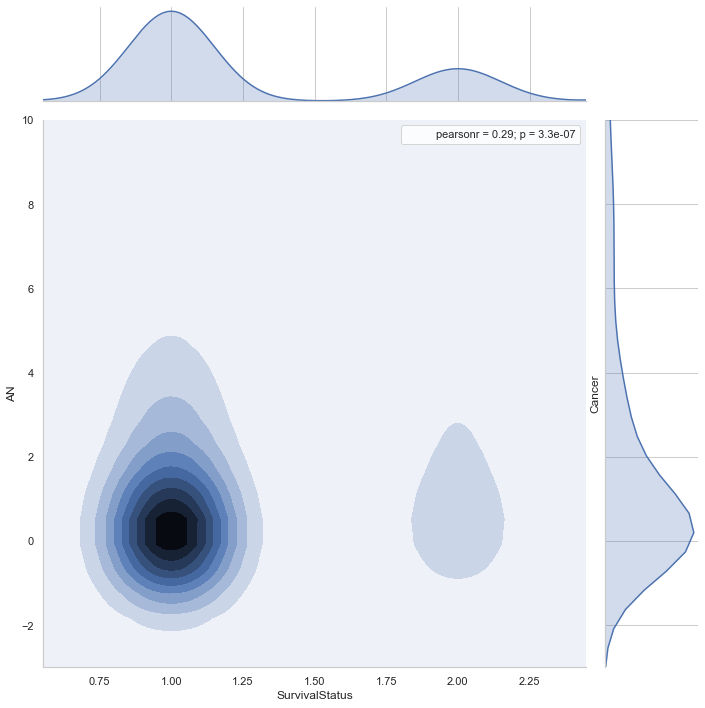

In [130]:
sns.jointplot(data=df, x="SurvivalStatus",y="AN", kind="kde",height=10,stat_func=pearsonr)
plt.ylim(-3,10)
plt.ylabel("Cancer")
plt.show()

Conclusion :<br>
1 Positive pearson correlation coefficient shows positive relationship.<br>
2 We can assume that that our evidence of the relationship between the variables is very strong as p value is very small.

<h1>Overall Conclusion :<br></h1> 
1 It is very difficult to predict the survival of the patients who had undergone surgery for breast cancer on the basis of these 3 features (i.e. Age, Operation_Year and axil_nodes) because both the classes (i.e. 1 and 2) are almost 85%-90% overlapping with each other.<br><br>
2 These two classes are linearly inseparable due to intense overlapping.<br><br>
3 We should collect more useful features which are helpful in predicting the survival of the patients who had undergone the surgery for breast cancer.<br><br>
4 We need to use non-linear models then only we can predict survival of the patients.<br><br>
5 Axil_nodes are around 20% more useful feature than Age and Operation_Year.<br><br>
6 Order of usefulness of features --> ( axil_nodes > Operation_Year > Age ).